In [1]:
import pandas as pd
import numpy as np

In [2]:
data1 = np.full((5,5),1)
index1 = (0,1,2,3,4)
columns1 = (0,1,2,3,4)

In [3]:
df1 = pd.DataFrame(data1, index1, columns1)

In [4]:
data2 = np.full((5,5),2)
index2 = (5,6,7,8,9)
columns2 = (0,1,2,3,4)

In [5]:
df2 = pd.DataFrame(data2, index2, columns2)

In [6]:
data3 = np.full((5,5),3)
index3 = (0,1,2,3,4)
columns3 = (5,6,7,8,9)

In [7]:
df3 = pd.DataFrame(data3, index3, columns3)

In [8]:
df1

0  1  2  3  4
0  1  1  1  1  1
1  1  1  1  1  1
2  1  1  1  1  1
3  1  1  1  1  1
4  1  1  1  1  1

In [9]:
df2

0  1  2  3  4
5  2  2  2  2  2
6  2  2  2  2  2
7  2  2  2  2  2
8  2  2  2  2  2
9  2  2  2  2  2

In [10]:
df3

5  6  7  8  9
0  3  3  3  3  3
1  3  3  3  3  3
2  3  3  3  3  3
3  3  3  3  3  3
4  3  3  3  3  3

In [11]:
pd.concat([df1,df2], axis=1)

0    1    2    3    4    0    1    2    3    4
0  1.0  1.0  1.0  1.0  1.0  NaN  NaN  NaN  NaN  NaN
1  1.0  1.0  1.0  1.0  1.0  NaN  NaN  NaN  NaN  NaN
2  1.0  1.0  1.0  1.0  1.0  NaN  NaN  NaN  NaN  NaN
3  1.0  1.0  1.0  1.0  1.0  NaN  NaN  NaN  NaN  NaN
4  1.0  1.0  1.0  1.0  1.0  NaN  NaN  NaN  NaN  NaN
5  NaN  NaN  NaN  NaN  NaN  2.0  2.0  2.0  2.0  2.0
6  NaN  NaN  NaN  NaN  NaN  2.0  2.0  2.0  2.0  2.0
7  NaN  NaN  NaN  NaN  NaN  2.0  2.0  2.0  2.0  2.0
8  NaN  NaN  NaN  NaN  NaN  2.0  2.0  2.0  2.0  2.0
9  NaN  NaN  NaN  NaN  NaN  2.0  2.0  2.0  2.0  2.0

In [12]:
pd.concat([df1,df3], axis=1)

0  1  2  3  4  5  6  7  8  9
0  1  1  1  1  1  3  3  3  3  3
1  1  1  1  1  1  3  3  3  3  3
2  1  1  1  1  1  3  3  3  3  3
3  1  1  1  1  1  3  3  3  3  3
4  1  1  1  1  1  3  3  3  3  3

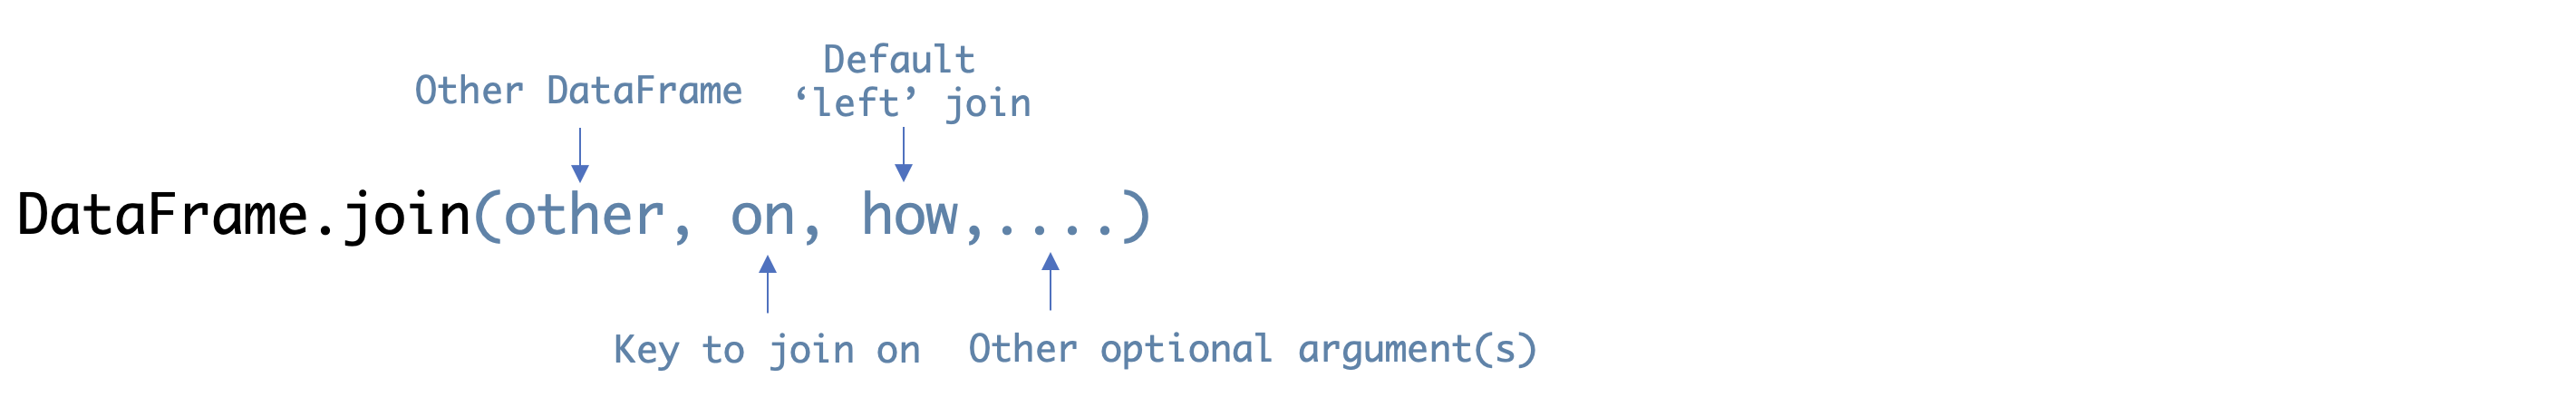

In [13]:
emp = pd.read_excel('employees_hr.xls',sheet_name='employees')

In [14]:
dept = pd.read_excel('employees_hr.xls',sheet_name='departments')

In [15]:
emp.head()

emp_id first_name last_name  dept_id  salary
0  677509       Lois    Walker        2   51356
1  940761     Brenda  Robinson        2   40887
2  428945        Joe  Robinson        1   50445
3  408351      Diane     Evans        5   41728
4  193819   Benjamin   Russell        5   47202

In [16]:
dept.head()

id        dept_name dept_location
0   0  Human Resources           USA
1   1          Finance        Europe
2   2        Marketing           USA
3   3       Production        Europe
4   4            Sales           USA

In [17]:
# The key from the 'other' DataFrame must be an index
emp.join(dept.set_index('id'), on='dept_id', how='outer')[['emp_id','dept_name']]

emp_id         dept_name
0.0   677509.0         Marketing
1.0   940761.0         Marketing
2.0   428945.0           Finance
13.0  278556.0           Finance
3.0   408351.0               R&D
4.0   193819.0               R&D
8.0   477616.0               R&D
17.0  726264.0               R&D
5.0   499687.0   Human Resources
11.0  621833.0   Human Resources
12.0  456747.0   Human Resources
14.0  333476.0   Human Resources
6.0   539712.0             Sales
7.0   380086.0             Sales
9.0   329752.0             Sales
10.0  893212.0             Sales
15.0  218791.0        Production
16.0  134841.0        Production
18.0  726262.0               NaN
NaN        NaN  Customer Service

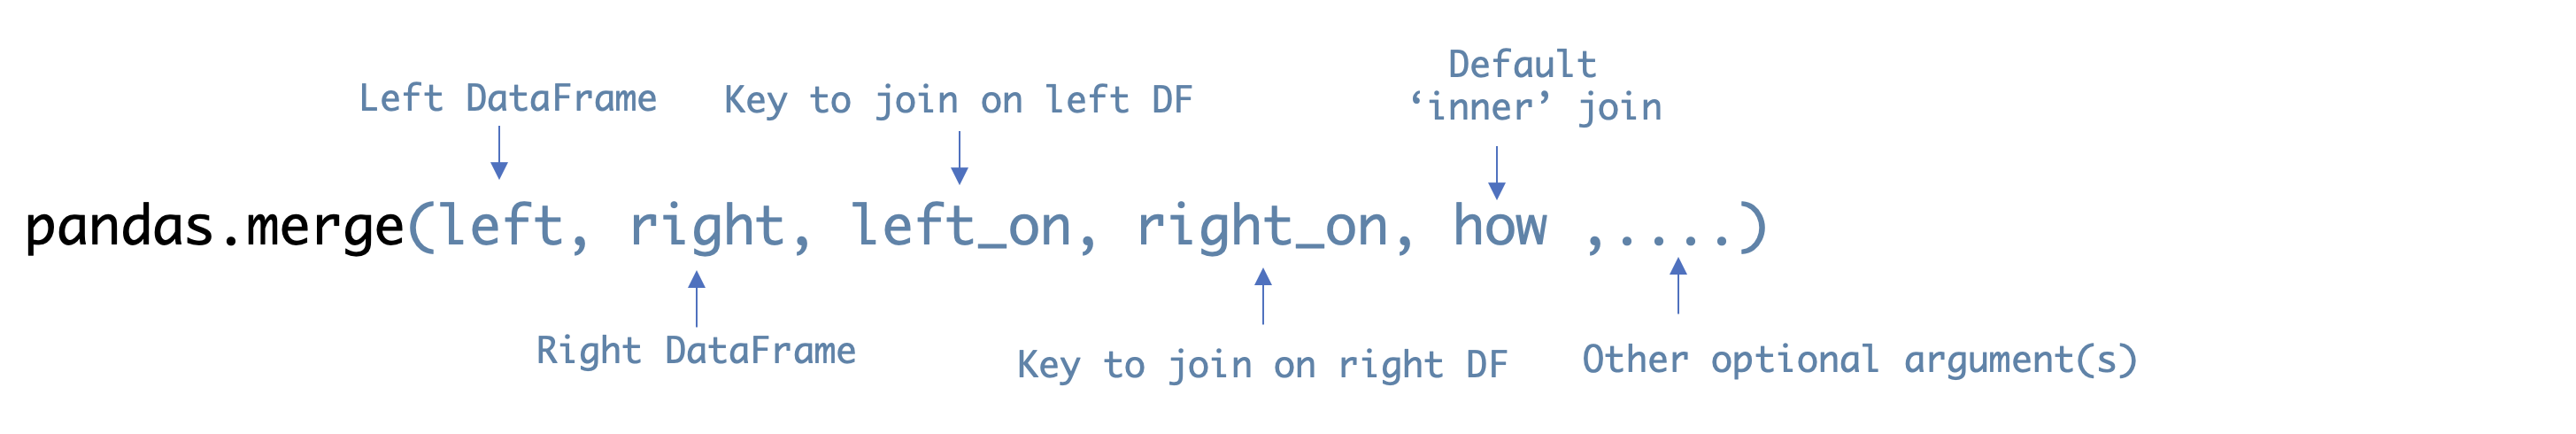

In [18]:
emp.head()

emp_id first_name last_name  dept_id  salary
0  677509       Lois    Walker        2   51356
1  940761     Brenda  Robinson        2   40887
2  428945        Joe  Robinson        1   50445
3  408351      Diane     Evans        5   41728
4  193819   Benjamin   Russell        5   47202

In [19]:
dept.head()

id        dept_name dept_location
0   0  Human Resources           USA
1   1          Finance        Europe
2   2        Marketing           USA
3   3       Production        Europe
4   4            Sales           USA

In [20]:
# With the merge function the keys on either DataFrames do not need to be indexes
pd.merge(left=emp, right=dept, left_on='dept_id', right_on='id', how='left')

emp_id first_name  last_name  dept_id  salary   id        dept_name  \
0   677509       Lois     Walker        2   51356  2.0        Marketing   
1   940761     Brenda   Robinson        2   40887  2.0        Marketing   
2   428945        Joe   Robinson        1   50445  1.0          Finance   
3   408351      Diane      Evans        5   41728  5.0              R&D   
4   193819   Benjamin    Russell        5   47202  5.0              R&D   
5   499687    Patrick     Bailey        0   61603  0.0  Human Resources   
6   539712      Nancy      Baker        4   57919  4.0            Sales   
7   380086      Carol     Murphy        4   64590  4.0            Sales   
8   477616    Frances      Young        5   32196  5.0              R&D   
9   329752    Lillian      Brown        4   60078  4.0            Sales   
10  893212        Amy     Howard        4   36090  4.0            Sales   
11  621833    Gregory    Edwards        0   38068  0.0  Human Resources   
12  456747        Roy    Griffin        0   54965  0.0  Human Resources   
13  278556    Richard   Mitchell        1   78451  1.0          Finance   
14  333476       Mary     Wilson        0   54362  0.0  Human Resources   
15  218791      Aaron      Price        3   41690  3.0       Production   
16  134841      Donna      Brown        3   44665  3.0       Production   
17  726264       Carl    Collins        5   41362  5.0              R&D   
18  726262       John  Alexander        7  100000  NaN              NaN   

   dept_location  
0            USA  
1            USA  
2         Europe  
3            USA  
4            USA  
5            USA  
6            USA  
7            USA  
8            USA  
9            USA  
10           USA  
11           USA  
12           USA  
13        Europe  
14           USA  
15        Europe  
16        Europe  
17           USA  
18           NaN

## Links and resources:
* join, merge, concatenate and compare: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
* concat: https://pandas.pydata.org/docs/reference/api/pandas.concat.html
* join: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html
* merge: https://pandas.pydata.org/docs/reference/api/pandas.merge.html